In [13]:
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


# Extraction function
def tflog2pandas(path: str) -> pd.DataFrame:
    """convert single tensorflow log file to pandas DataFrame
    https://github.com/theRealSuperMario/supermariopy/blob/master/scripts/tflogs2pandas.py
    
    Parameters
    ----------
    path : str
        path to tensorflow log file
    
    Returns
    -------
    pd.DataFrame
        converted dataframe
    """
    DEFAULT_SIZE_GUIDANCE = {
        "compressedHistograms": 1,
        "images": 1,
        "scalars": 0,  # 0 means load all
        "histograms": 1,
    }
    runlog_data = pd.DataFrame({"metric": [], "value": [], "step": []})
    try:
        event_acc = EventAccumulator(path, DEFAULT_SIZE_GUIDANCE)
        event_acc.Reload()
        tags = event_acc.Tags()["scalars"]
        for tag in tags:
            event_list = event_acc.Scalars(tag)
            values = list(map(lambda x: x.value, event_list))
            step = list(map(lambda x: x.step, event_list))
            r = {"metric": [tag] * len(step), "value": values, "step": step}
            r = pd.DataFrame(r)
            runlog_data = pd.concat([runlog_data, r])
    # Dirty catch of DataLossError
    except:
        print("Event file possibly corrupt: {}".format(path))
        traceback.print_exc()
    return runlog_data

In [16]:
ddqn_df = tflog2pandas("experiments/soko_ddqn/summaries/events.out.tfevents.1580038612.Jastillss-iMac.local")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
dqn_df = tflog2pandas("experiments/soko_dqn_exp0/summaries/events.out.tfevents.1579790855.Jastillss-iMac.local")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
dn_df = tflog2pandas("experiments/soko_duelingddqn/summaries/events.out.tfevents.1580257421.Jastillss-iMac.local")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'metric': ['Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score', 'Training_best_score',

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

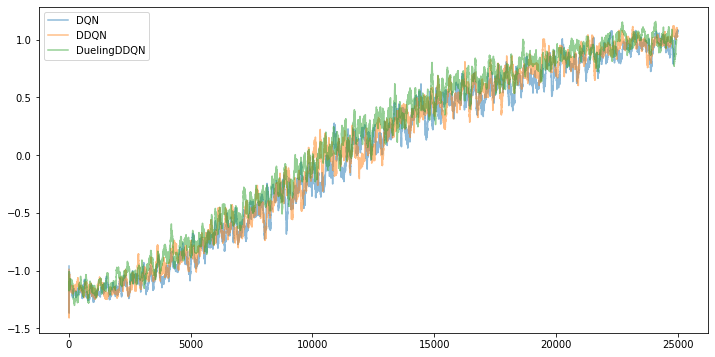

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))

dqn_df_ra = dqn_df[lambda x: x.metric == 'Training_Ep_rewards_running_average']
ddqn_df_ra = ddqn_df[lambda x: x.metric == 'Training_Ep_rewards_running_average']
dn_df_ra = dn_df[lambda x: x.metric == 'Training_Ep_rewards_running_average']


ax.plot(dqn_df_ra.step, dqn_df_ra.value, alpha=0.5, label="DQN")
ax.plot(ddqn_df_ra.step, ddqn_df_ra.value, alpha=0.5, label="DDQN")
ax.plot(dn_df_ra.step, dn_df_ra.value, alpha=0.5, label="DuelingDDQN")

ax.legend()
plt.show()

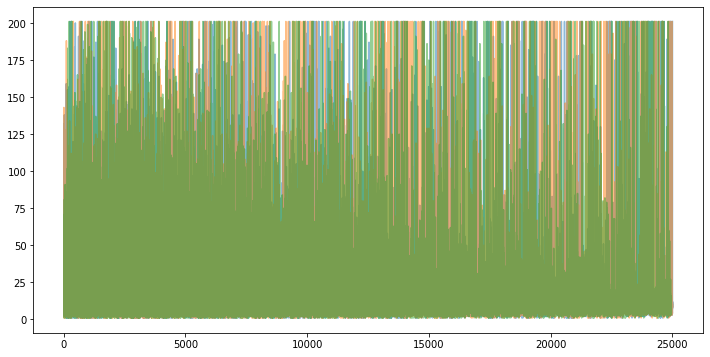

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))

dqn_df_ra = dqn_df[lambda x: x.metric == 'Training_Ep_duration']
ddqn_df_ra = ddqn_df[lambda x: x.metric == 'Training_Ep_duration']
dn_df_ra = dn_df[lambda x: x.metric == 'Training_Ep_duration']


ax.plot(dqn_df_ra.step, dqn_df_ra.value, alpha=0.5)
ax.plot(ddqn_df_ra.step, ddqn_df_ra.value, alpha=0.5)
ax.plot(dn_df_ra.step, dn_df_ra.value, alpha=0.5)